# Description
**According to the recent report of WHO, India is the 6th most depressed country in the world. What makes us so,have you ever pondered? A picture speaks more than 1000 words,a well knwon saying,with this thought here is my notebook that shows an explanatory analysis of the Suicide rate in India from 2001-2012.**

## About the dataset
**This dataset contains yearly suicide details of all states/u.t of India by various parameters from 2001-2012.The parameters are as follows:-**
* Gender
* Age Group
* Total
* Type Code - It mainly shows the causes which is categorised as Social,Educational,Professional,Social Status
* Type - It further categorise the Type code that is the causes

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Plotly libraries
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

**Loading data**

In [2]:
data=pd.read_csv('Suicides in India 2001-2012.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [3]:
data.sample(10)

State  Year             Type_code  \
219021      Uttar Pradesh  2004                Causes   
195743          Rajasthan  2012         Means_adopted   
19483   Arunachal Pradesh  2011         Means_adopted   
23871               Assam  2007      Education_Status   
76308             Gujarat  2004         Means_adopted   
117086             Kerala  2004  Professional_Profile   
67535                 Goa  2001                Causes   
233948        West Bengal  2006         Means_adopted   
146172            Manipur  2008         Means_adopted   
218912      Uttar Pradesh  2004                Causes   

                                           Type  Gender Age_group  Total  
219021                                Paralysis  Female     30-44      1  
195743    By Jumping off Moving Vehicles/Trains    Male     30-44     19  
19483                   By Fire/Self Immolation    Male     45-59      1  
23871                     Matriculate/Secondary    Male    0-100+    378  
76308   By coming under running vehicles/trains    Male     30-44     59  
117086                  Others (Please Specify)    Male      0-14      2  
67535             Other Causes (Please Specity)    Male      0-14      0  
233948                               By Hanging  Female     45-59    585  
146172                By Consuming Insecticides  Female      0-14      0  
218912                             Love Affairs  Female      0-14      0

## Data Cleaning
**Before performing EDA on the dataset,data cleaning is important step which involves renmaing some of the entries and dropping some of the rows.**

In [4]:
# rename states

data.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
data.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
data.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
data.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
data.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
data.replace('Delhi (Ut)', 'Delhi', inplace=True)


In [5]:
# rename Type

data.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
data.replace('By Other means (please specify)', 'By Other means', inplace=True)
data.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [6]:
data = data.drop(data[(data.State == 'Total (Uts)') | (data.State == 'Total (All India)') | 
               (data.State == 'Total (States)')].index)


In [7]:
data=data.drop(data[(data.Type =='By Other means')|(data.Type=='Other Causes (Please Specity)')|
                    (data.Type=='Others (Please Specify)')|(data.Type=='Causes Not known')].index)

In [8]:
data = data.drop(data[data.Total==0].index)

## EDA 

**Using plotly an animation slider is plotted for States to show the changing number in the total counts of suicide. Any instance from 2001-2012 can be paused and analysed.**

In [10]:
fig = px.bar(data, x="State", y="Total", color="State",
  animation_frame="Year", animation_group="Total", range_y=[0,20000],width=1000)
py.offline.iplot(fig)

**The below cell shows the most number of suicide counts in states,arranged in highest to lowest.We can observe that states such as Andhra Pradesh,Karnataka,Tamil Nadu counts 4000+ signifying an alarming rate.**

In [11]:
temp_state = data.groupby('State').count()['Total'].reset_index().sort_values(by='Total',ascending=False)
temp_state.style.background_gradient(cmap='Reds')

**Counts of suicide basis on gender. The above pie chart shows that male are more prone to have suicidal instincts than female.**

Female    39444
Male      47132
Name: Gender, dtype: int64


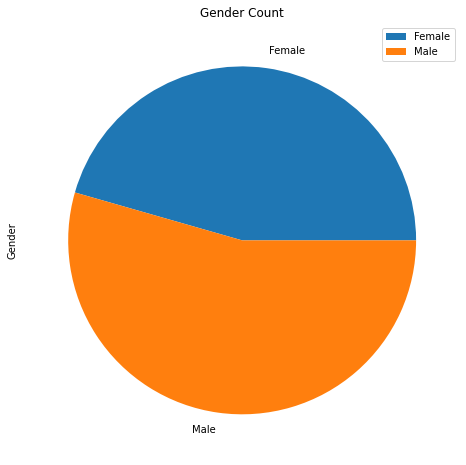

In [12]:
counts = data['Gender'].value_counts().sort_index()
print(counts)
# Plot a pie chart
counts.plot(kind='pie', title='Gender Count',figsize=(10,8))

plt.legend()
plt.show()

**There are many Causes and sub causes as stated in the dataset.Observing which causes are more responsible for the suicide rates.**

In [13]:
# splitting data as per the type code

cause = data[data['Type_code'] == 'Causes']
edu_status = data[data['Type_code'] == 'Education_Status']
means_adpt = data[data['Type_code'] == 'Means_adopted']
prof = data[data['Type_code'] == 'Professional_Profile']
soc_status = data[data['Type_code'] == 'Social_Status']

In [14]:
def plot_type(data, Title, X_lab):
    p_type = data.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2')  

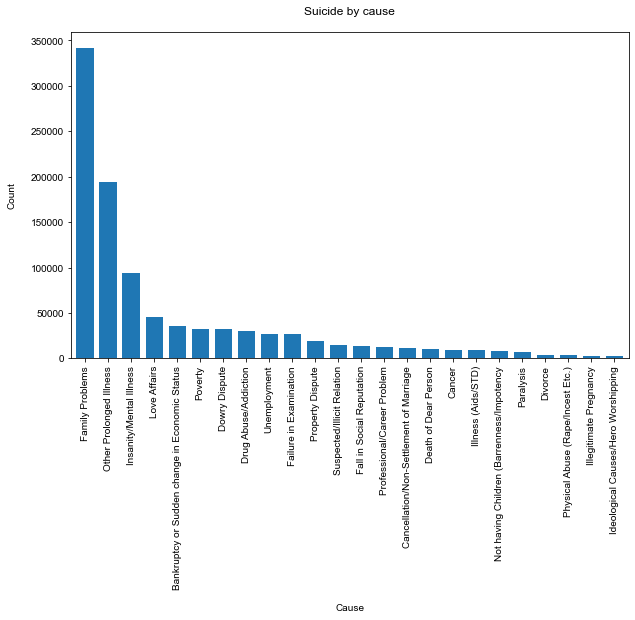

In [15]:
# plot by Cause
plot_type(cause, 'Suicide by cause', 'Cause')

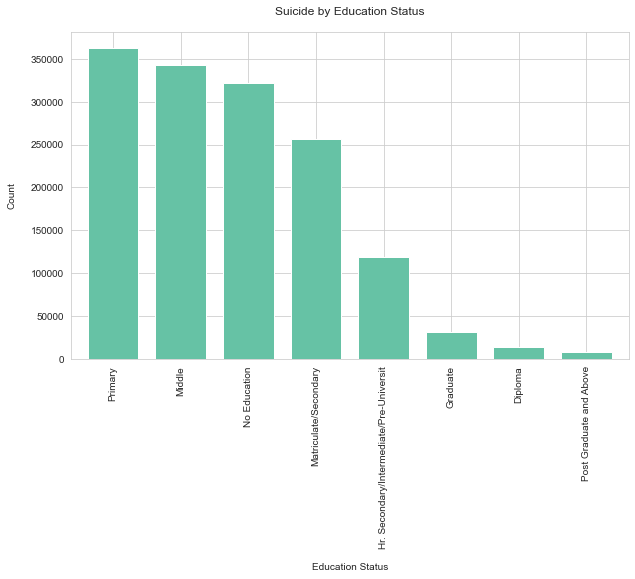

In [16]:
#plot by the educational causes
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

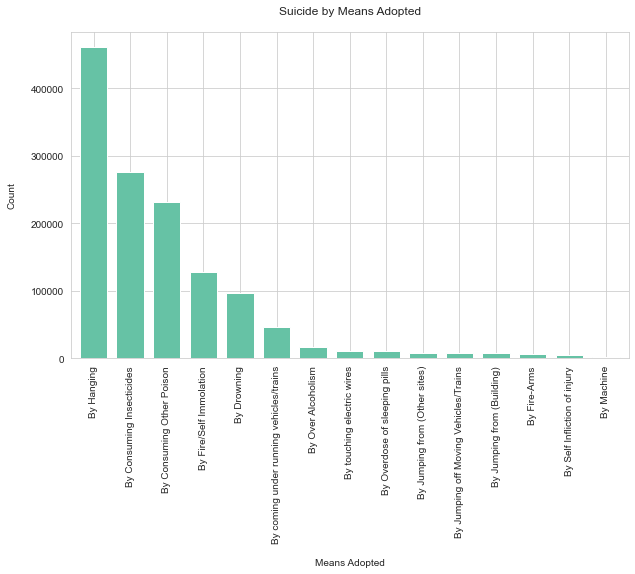

In [17]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

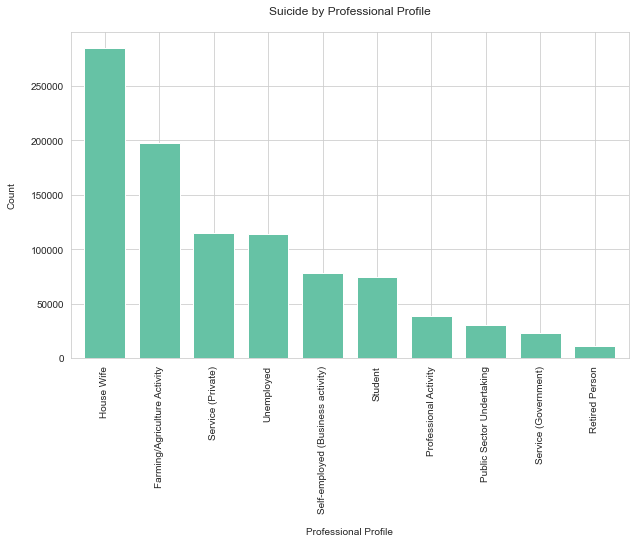

In [18]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

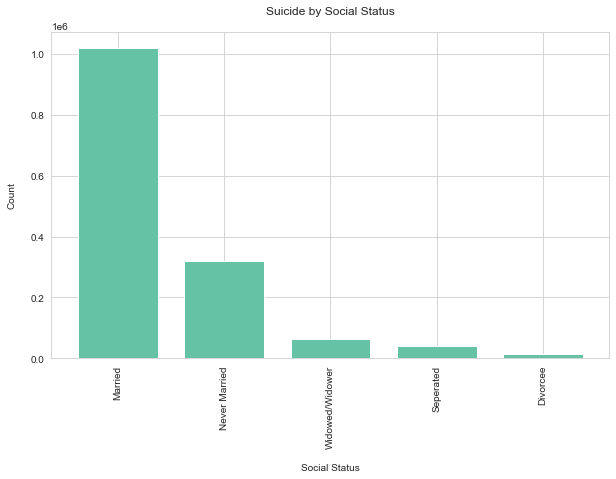

In [19]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status')

## Top 3 states having more suicides rates 
**Andhra Pradesh,Tamil Nadu,Karnataka ranks the top 3 states having the larming rate for suicide counts.What are the causes that are most reponsible, which age group is more affected ?**

In [20]:
#Splitting the data as per the State
State1 = data[data['State']=='Karnataka']
State2 = data[data['State']=='Tamil Nadu']
State3 = data[data['State']=='Andhra Pradesh']


In [21]:
def plot_for_State_by_age(data):
    plt.figure(figsize=(12,6))
    data = data[['Age_group','Gender','Total']]
    edSort = data.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Age_group',y='Total',hue='Gender',data=edSort,palette='RdBu')

In [22]:
def plot_for_State_by_type(data):
    plt.figure(figsize=(12,6))
    data = data[['Type_code','Gender','Total']]
    edSort = data.groupby(['Type_code','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
    sns.barplot(x='Type_code',y='Total',hue='Gender',data=edSort,palette='ch:2.5,-.2,dark=.3')

## Karnataka 

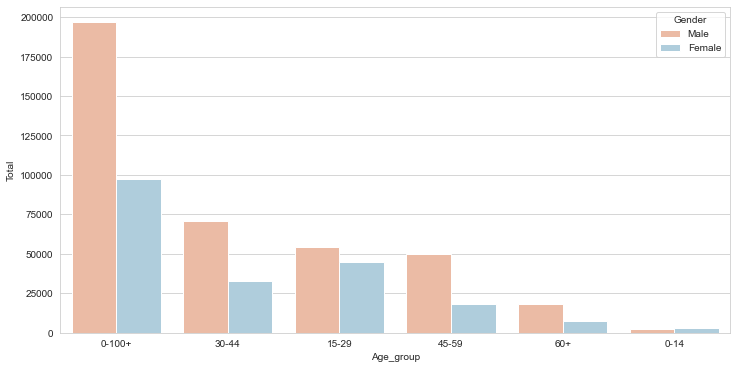

In [23]:
#plotting as per the age_group
plot_for_State_by_age(State1)

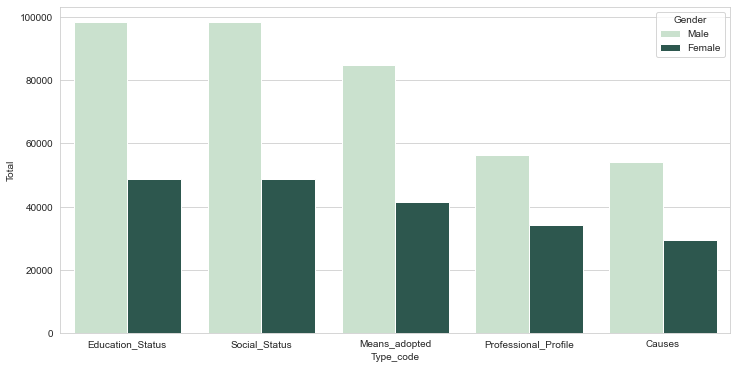

In [24]:
#plotting as per the differnet causes
plot_for_State_by_type(State1)

## Tamil Nadu 

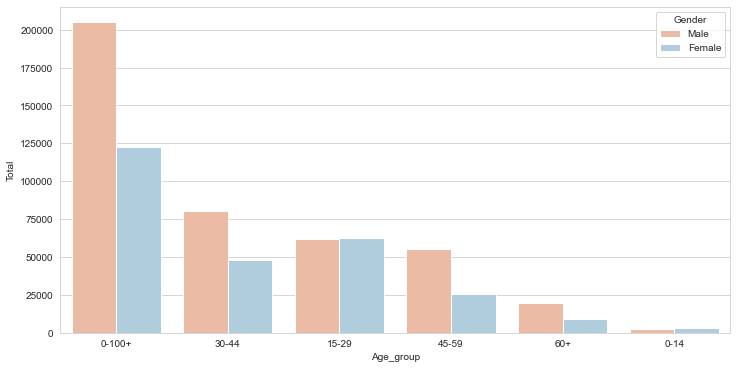

In [25]:
#plotting as per the age_group
plot_for_State_by_age(State2)

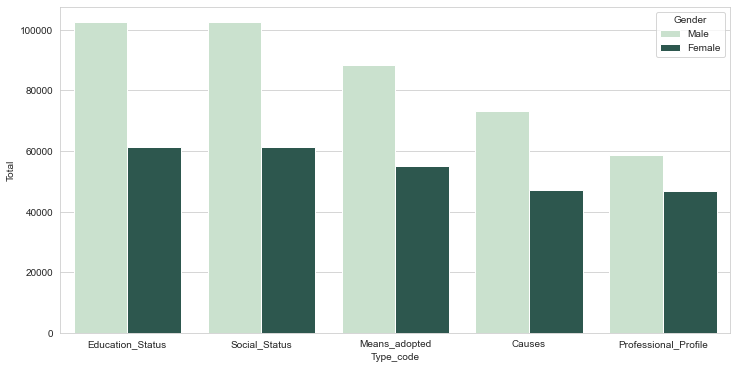

In [26]:
#plotting as per the differnet causes
plot_for_State_by_type(State2)

## Andhra Pradesh 

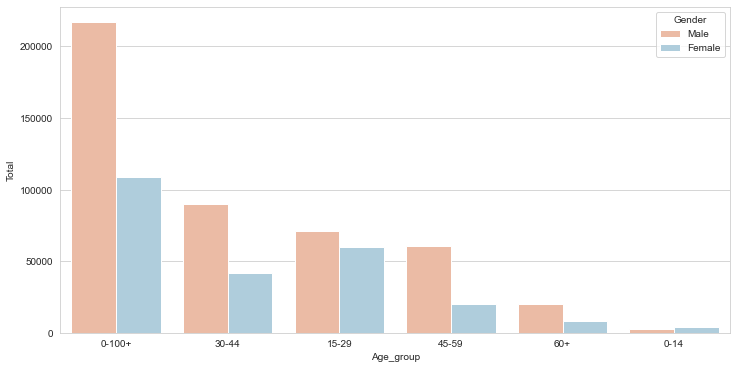

In [27]:
#plotting as per the age_group
plot_for_State_by_age(State3)

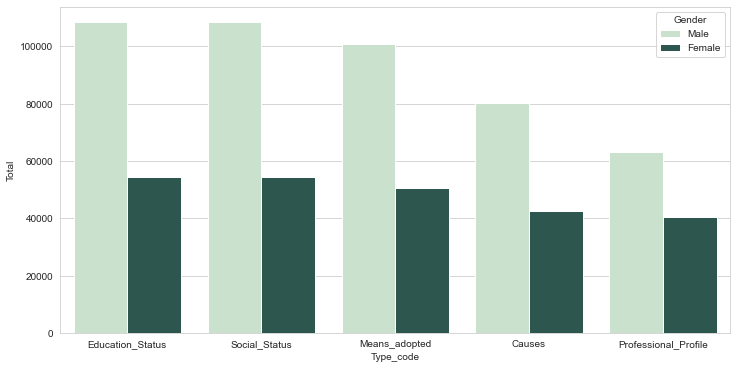

In [28]:
#plotting as per the differnet causes
plot_for_State_by_type(State3)